# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks")

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv("foodhub_order.csv")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# The shape method is used to show the number of rows and columns of a data frame.
df.shape

(1898, 9)

#### Observations:
We can see that the data frame has 1898 rows and 10 columns, which means it is quite big and has a lot of data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# The info() method is used to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
We can see that the rating column is an object, indicating that it has missing values.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
"""The .to_numeric method is used to convert the "rating" column to numeric,
in order to identify the missing values.
The .isnull() method counts the missing values
and the .sum() method adds them up
"""

df["rating"] = pd.to_numeric(df["rating"], errors = "coerce")

df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0


#### Observations:
We can see that there are 736 missing values in the "rating column"

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# We apply the .describe method to see relevant metrics of the dataframe.
df["food_preparation_time"].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


#### Observations:
We can see that the minimum preparation time is 20 minutes, the average is 27.37 and the maximum is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
""" We use the can use a function that applies the .isnull().sum() methods
which we previously mentioned to the "rating" column to show it's missing values. """

null_count_rating = df["rating"].isnull().sum()

print(null_count_rating)

736


#### Observations:
We can see that 736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [5 marks]

In [ ]:
"""We can use the .value_counts method to see the number orders per restaurant.
Then the .head() method show the top 5 restaurants with the most orders."""

restaurant_count = df["restaurant_name"].value_counts()

top_restaurants = restaurant_count.head(5)

print(top_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


In [ ]:
"""We can use the .value_counts method
to see the number orders per cuisine type."""
cuisine_count = df["cuisine_type"].value_counts()

print(cuisine_count)

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


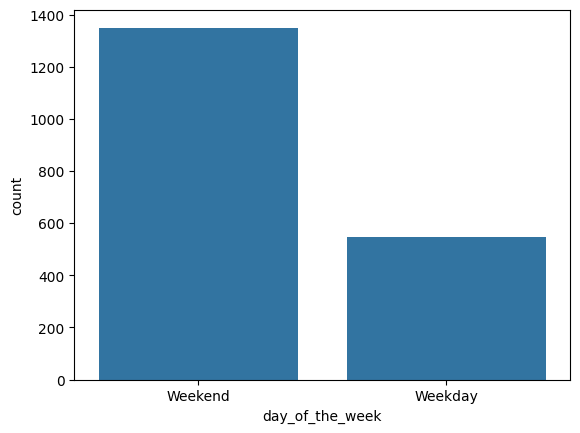

In [ ]:
"""We can use a countplot on the "day_of_the_week" column
to see which has the most orders"""
sns.countplot(data = df, x = "day_of_the_week")

plt.show()

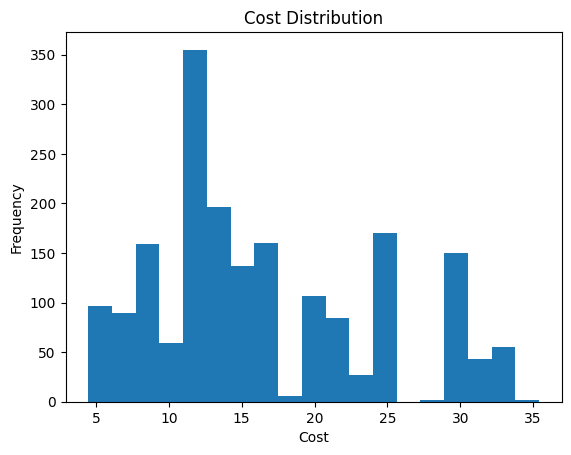

In [ ]:
"""We use a histogram to show the distribution of any numeric variable,
in this case the order costs.
The bins are set to auto, to automatically set the number of x"""
plt.hist(df["cost_of_the_order"], bins = "auto")

#We set the title using plt.title

plt.title("Cost Distribution")

#Then we define the x and y labels

plt.xlabel("Cost")

plt.ylabel ("Frequency")

plt.show()

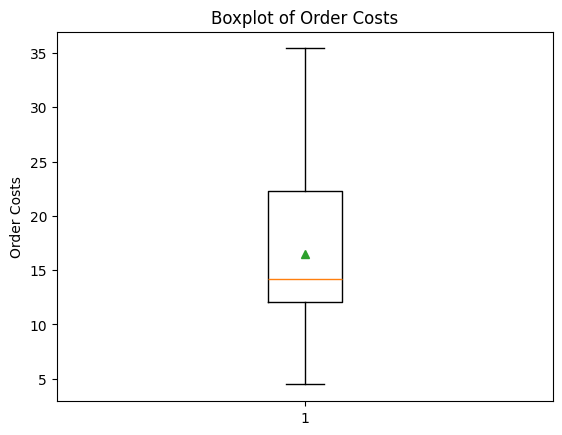

In [ ]:
"""We can use a boxplot to se the
Q1,Q2,Q3 and for of any numeric variable,
in this case the costs.
We also use showmeans = True to also dysplay the mean"""

plt.boxplot (df["cost_of_the_order"], showmeans = True)

plt.title("Boxplot of Order Costs")

plt.ylabel ("Order Costs")

plt.show()

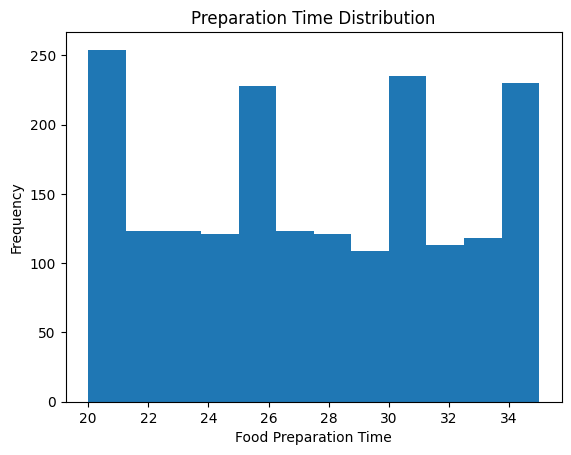

In [ ]:
plt.hist(df["food_preparation_time"], bins = "auto")

plt.title("Preparation Time Distribution")

plt.xlabel("Food Preparation Time")

plt.ylabel ("Frequency")

plt.show()

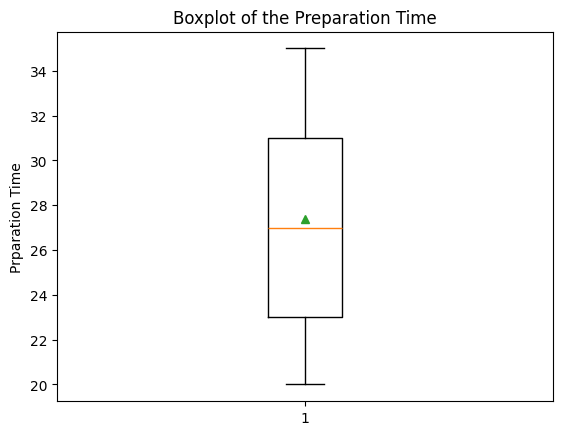

In [ ]:
plt.boxplot (df["food_preparation_time"], showmeans = True)

plt.title("Boxplot of the Preparation Time")

plt.ylabel ("Prparation Time")

plt.show()

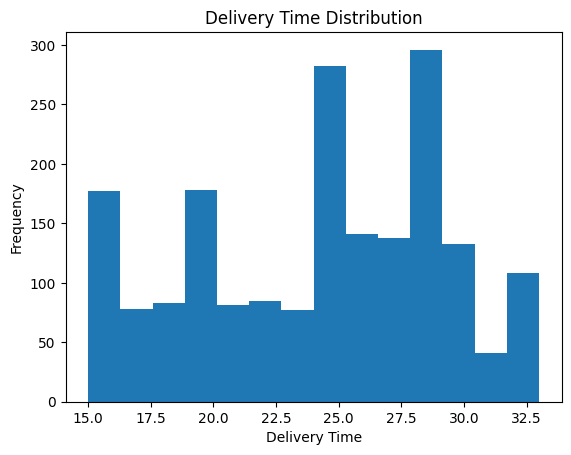

In [ ]:
plt.hist(df["delivery_time"], bins = "auto")

plt.title("Delivery Time Distribution")

plt.xlabel("Delivery Time")

plt.ylabel ("Frequency")

plt.show()

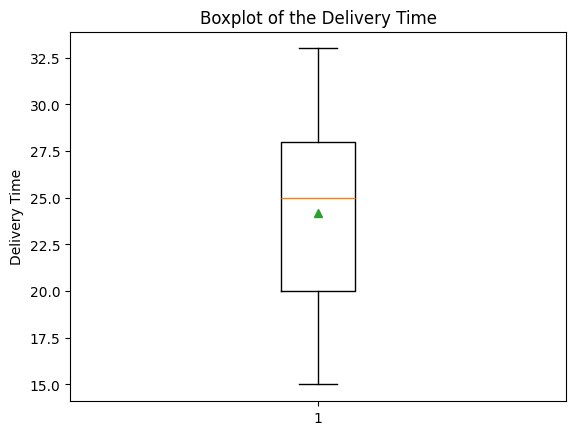

In [ ]:
plt.boxplot (df["delivery_time"], showmeans = True)

plt.title("Boxplot of the Delivery Time")

plt.ylabel ("Delivery Time")

plt.show()

#### Observations:

We can see that these are the top five restaurants in number of orders:

Shake Shack                  
The Meatball Shop
Blue Ribbon Sushi            
Blue Ribbon Fried Chicken     
Parm,

so maybe they should be given priority by the food agregator company
when it comes to pick up order.

We can also see that the most ordered cuisine types are:

American          
Japanese          
Italian           
Chinese,

by quite a significant margin. The agregator can either choose to give
these cuisine types priority, or maybe try to give the other cuisine types
some more exposure in their app, or some sort of discount to help boost sales.

Altough it makes some sense that these are on top, because these cuisines
are usually the most sought after in the american market, specially on the east coast.

New York is famous for take outs of these cuisine types like chinese, sushi is always popular and it's popularity is rising nowadays and there has been a strong and influencial italian culture in New York for some time now.

We can also see that there are a lot more orders on weekends, which makes sense,
people want to relax and might not want to cook or leave their houses.

Also during the weekdays, people might not have time to wait for their food to arrive.
New York has a lot of traffic and people are always in a frenzy, usually opting for something quick like dollar pizza slices, and quick food truck foods like, hot dogs, a bacon, egg and cheese sandwich or tacos.

In regards to the histograms and boxplots, there isn't really significant data.

The median cost is around 14 dollars and the mean is around 16. Taking into account
that the market is New York and the orders are in dollars, it doesn't seem far form normal prices.

The median preparation time is around 27,5 minutes and the mean is also around the same.
Which might seem a bit high, but New York has a big population and the data frame shows us that there are a lot of orders.

The median delivery time is around 25 minutes and the mean is around 24, which, taking into account the traffic volume of the city might not be as high as it would seem.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
"""We can use the .value_counts method to see the number orders per restaurant.
Then the .head() method show the top 5 restaurants with the most orders."""

restaurant_count = df["restaurant_name"].value_counts()

top_restaurants = restaurant_count.head(5)

print(top_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
We can see that Shake Shack, The Meatball Shop and Blue Ribbon Sushi are above the rest of the restaurants in terms of orders by a considerable margin.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# We made a new data frame out of the "day_of_the_week" column with only the "Weekend"

weekend_data = df[df["day_of_the_week"] == "Weekend"]

# Then we count the individual values of cuisine types on weekends

popular_cuisine = weekend_data["cuisine_type"].value_counts()

# And we index the value with index 0, to see the most popular cuisine type on weekends.

most_popular = popular_cuisine.index[0]

print(most_popular)

American


#### Observations:
We can see that the most popular cuisine type on weekends is American.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [1 marks]

In [ ]:
# First we make a data frame of the orders that cost more than 20 dollars.

more_than_20_df = df[df["cost_of_the_order"] > 20]

"""Then we divide the new data frame by the original cost column
and multiply by 100 to get the percentage."""

percentage_more_than_20 = (len(more_than_20_df) / len(df["cost_of_the_order"])) * 100

print(round(percentage_more_than_20, 2))

29.24


#### Observations:
We can see that the percentage of orders that cost more than 20 dollars is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# We apply the .mean() method to the "delivery_time" column to get its mean.

df["delivery_time"].mean()

np.float64(24.161749209694417)

#### Observations:
We can see that the mean order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# We apply the .value_counts() method to the "customer_id" column to get the id counts.

id_count = df["customer_id"].value_counts()

# Then we use the .head(3) method to see the top 3 customers by of number of orders.

top_customers = id_count.head(3)

print(top_customers)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
We can se that the top 3 customers are 52832 with 13 orders, 47440 with 10 orders and, 83287 with 9 orders. These are the 20% discount vouchers winners.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [5 marks]


In [ ]:
"""We convert the data frame into a correlation matrix,
but first exclude the "order_id" and the "customer_id" columns as they are unnecessary."""
columns_to_exclude = ["order_id", "customer_id"]

""" We use the .drop method to drop the unnecessary columns,
then we use the .corr method to convert the data into a correlation matrix.
The numeric_only is set to True to avoid errors with the rating column."""

corr_matrix = df.drop(columns_to_exclude, axis=1).corr(numeric_only=True)

corr_matrix

,cost_of_the_order,rating,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.033983,0.041527,-0.029949
rating,0.033983,1.000000,-0.006083,-0.009804
food_preparation_time,0.041527,-0.006083,1.000000,0.011094
delivery_time,-0.029949,-0.009804,0.011094,1.000000


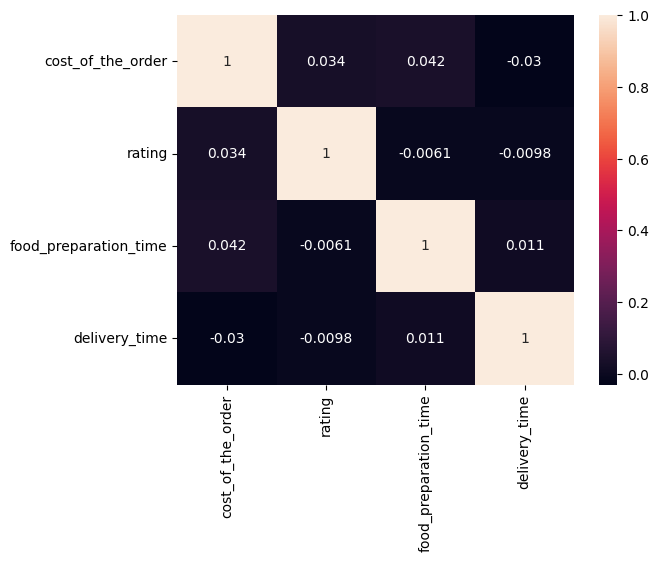

In [ ]:
# We plot a heat map of the correlation matrix.

sns.heatmap (corr_matrix, annot = True)

plt.show()

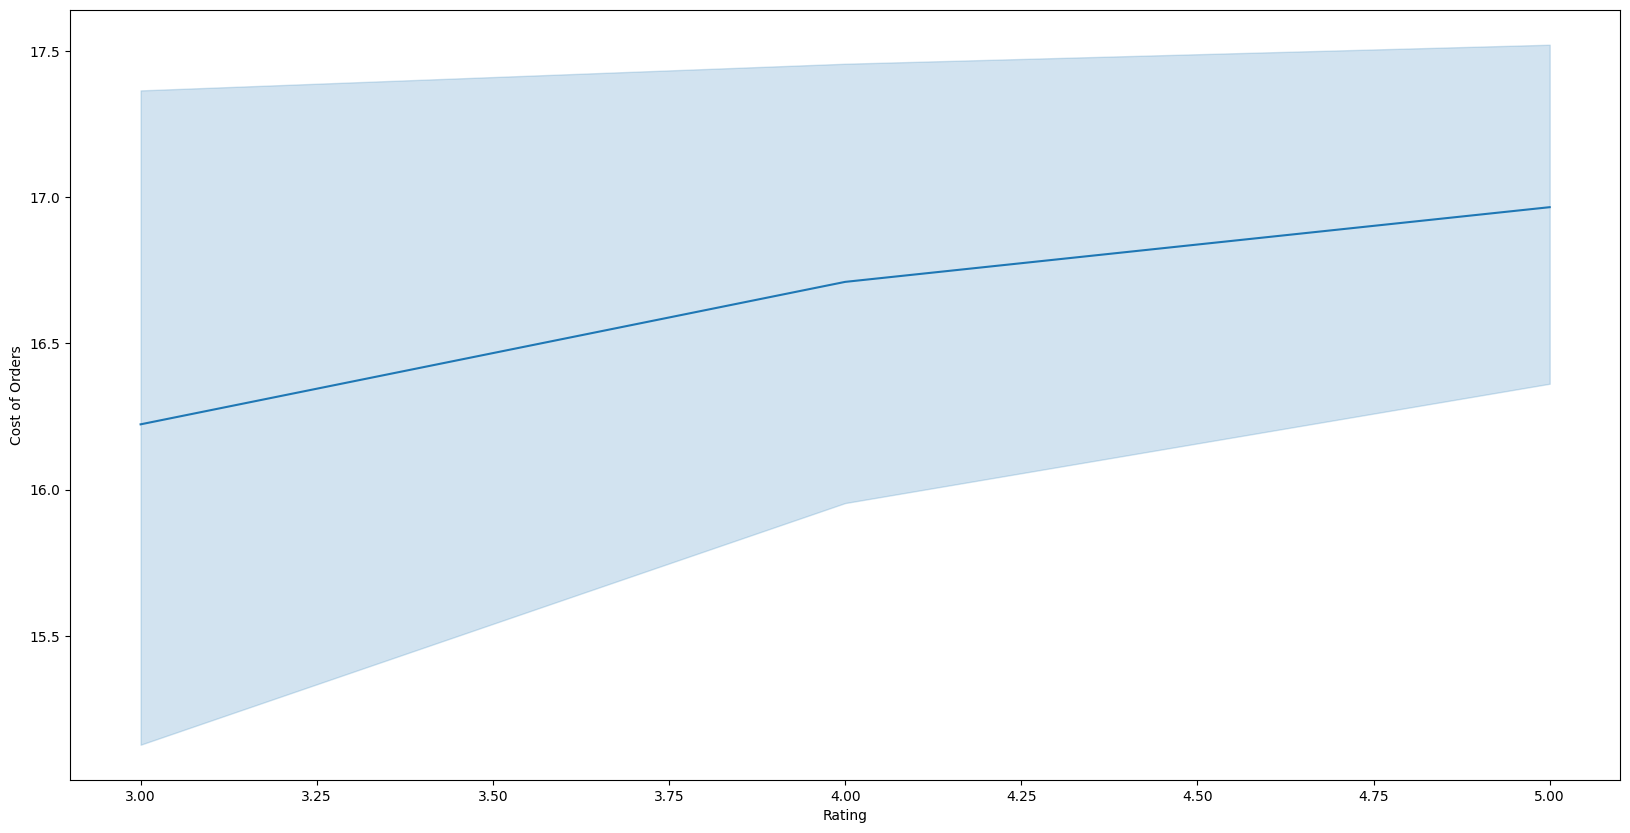

In [ ]:
# We set the line plot size

plt.figure(figsize = (20, 10))

# We set the x to cost and the y to rating ussing the data frame data

sns.lineplot(y = "cost_of_the_order", x = "rating", data = df)

# We set the x and y labels

plt.xlabel("Rating")

plt.ylabel ("Cost of Orders")

plt.show()

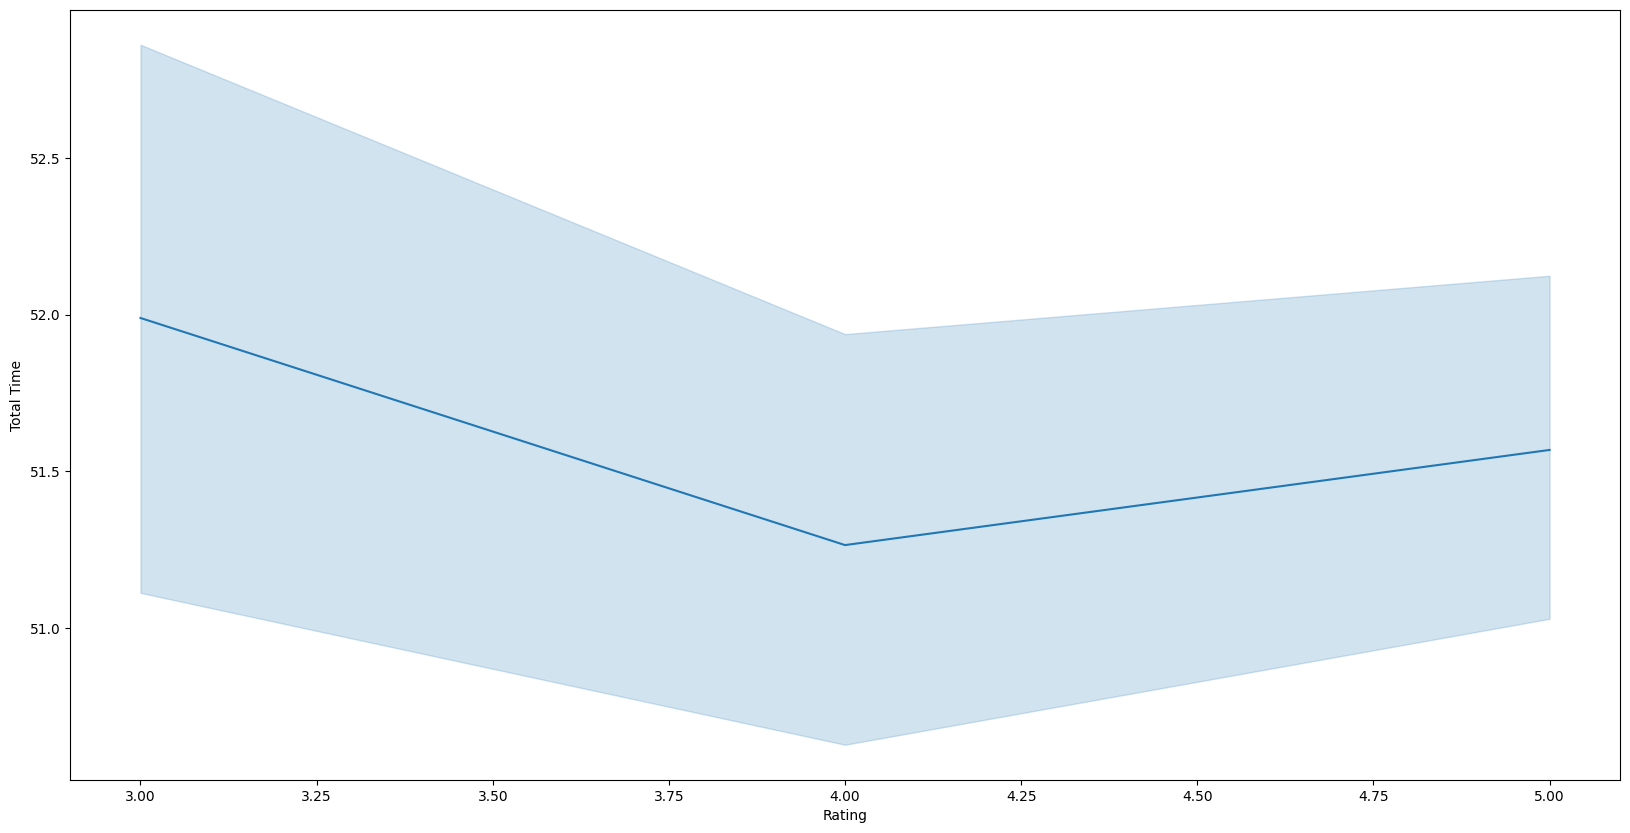

In [ ]:
# We set the line plot size

plt.figure(figsize = (20, 10))

# We add a new column to the data frame with the total time

df["Total_Time"] = df["food_preparation_time"] + df["delivery_time"]

# We assign the x and the y

sns.lineplot(y = "Total_Time", x = "rating", data = df)

# We set the x and y labels

plt.xlabel("Rating")

plt.ylabel ("Total Time")

plt.show()

In [ ]:
"""We use the .groupby method to group the dataframe by restaurant name
and then the .agg method to display the cost mean for each restaurant."""

restaurant_cost_mean = df.groupby("restaurant_name").agg(cost_mean=("cost_of_the_order", "mean"))

"""Then, we use the .sort_values method with ascending equal to False
to show the cost means in descending order. """

restaurant_cost_mean_sorted = restaurant_cost_mean.sort_values(by="cost_mean", ascending=False)

#Finally, we use the .head() method to show the top 5 most expensive restaurants

top_restaurant_cost = restaurant_cost_mean_sorted.head()

display(top_restaurant_cost)

,cost_mean
restaurant_name,
Kambi Ramen House,32.930
Emporio,31.430
Bhatti Indian Grill,31.115
Haru Gramercy Park,29.830
Il Bambino,29.250


In [ ]:
"""We can use the .value_counts method to see the number orders per restaurant.
Then the .head() method show the top 5 restaurants with the most orders."""

restaurant_count = df["restaurant_name"].value_counts()

top_restaurants = restaurant_count.head(5)

print(top_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


In [ ]:
"""We use the .groupby method to get a data frame of the restaurant names
and the .agg method with a dictionary that applies the values "count" and "mean"
to the key "rating" in order to get "rating" at column index 0 and "count" and "mean"
at column index 1. This creates two columns realted to the rating values side by side.
One with the rating count and the other with the rating means."""

rating_count_mean = df.groupby("restaurant_name").agg({"rating": ["count", "mean"]})

"""Then, we create a data frame which only has the rating counts bigger than 50
and the rating mean bigger than 4 using a boolean."""

selected_restaurants = rating_count_mean[(rating_count_mean[("rating", "count")] > 50) & (rating_count_mean[("rating","mean")] > 4)]

display(selected_restaurants)

rating          
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905

#### Observations:

We don't really see a major and obvious correlation between any of the values in the heat map.

There is a very minor correlation between the cost of the order and the rating, but it isn't substantial. There is also a very minor coorelation between the cost of the order and the preparation time. This might me explained by the fact that a more expensive order could mean a more complex dish, thus needing more time to prepare. Altough, once again, it isn't substantial.

We can see the correlation between the cost and the rating when we plot a line plot, but as previously stated, it isn't major.

When we plot a line plot between the total time and the rating, the line isn't consistent enough to show a correlation. Acording to the data, there isn't a direct correlation between total wait time and rating.

If we look at the cost means of the top 5 most expensive restaurants, there isn't a visible correlation with the top 5 most ordered restaurants, nor with the top 4 highly rated restaurants with more than 50 ratings.

However, there is a direct correlation between the top 5 most ordered restaurants and the top 4 restaurants with the highest rating and more than 50 ratings, as the restaurants from this rating data frame are all in the top 5 most ordered restaurants.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [1.5 marks]

In [ ]:
"""We use the .groupby method to get a data frame of the restaurant names
and the .agg method with a dictionary that applies the values "count" and "mean"
to the key "rating" in order to get "rating" at column index 0 and "count" and "mean"
at column index 1. This creates two columns realted to the rating values side by side.
One with the rating count and the other with the rating means."""

rating_count_mean = df.groupby("restaurant_name").agg({"rating": ["count", "mean"]})

"""Then, we create a data frame which only has the rating counts bigger than 50
and the rating mean bigger than 4 using a boolean."""

selected_restaurants = rating_count_mean[(rating_count_mean[("rating", "count")] > 50) & (rating_count_mean[("rating","mean")] > 4)]

display(selected_restaurants)



rating          
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905

#### Observations:
We can see that the restaurant fulfilling the criteria to get the promotional offer are: Blue Ribbon Fried Chicken; Blue Ribbon Sushi; Shake Shack and The Meatball Shop.

The rating count is usefull to dismiss outliers that could have had a big rating because they had a small rating count.

The restaurants themselves aren't really surprising, as sushi is always popular and is on the rise, fried chicken is also always popular.

Shake Shack is considered by many to be the best burger franchise in the east coast, specially in New York. Opposing the Five Guys franchise in the west coast, as contenders for the best burger franchise in the whole country.

The Meatball Shop is an italian restaurant and New York has had a deep and vast italian culture by many years.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [1.5 marks]

In [ ]:
# We make a new data frame to store the necessary revenue calculations.

revenue_df = pd.DataFrame()

"""We a column in the data frame with the orders
that cost more than 20 dollars and multiply it
by 0.25 to get 25% of these orders."""

revenue_df["revenue_more_than_20"] = df[df["cost_of_the_order"] > 20.0] ["cost_of_the_order"] * 0.25

"""Then we create another column with the orders above 5 dollars
and less or equal to 20 dollars using a boolean. We also multiply it by 0.15
to get 15% of these orders."""

revenue_df["revenue_more_than_5"] = df[(df["cost_of_the_order"] > 5.0) & (df["cost_of_the_order"] <= 20.0)] ["cost_of_the_order"] * 0.15

"""Finally, we summ the two columns to get the net revenue."""

net_revenue = revenue_df["revenue_more_than_20"].sum() + revenue_df["revenue_more_than_5"].sum()

print(net_revenue)

3688.7275


#### Observations:
We can see that the net revenue generated by the company across all orders is 3688.73 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [1 marks]

In [ ]:
# We sum the preparation time and the delivery time to get the total time.

df["Total_Time"] = df["food_preparation_time"] + df["delivery_time"]

# We create a data frame with the total times bigger than 60 minutes.

more_than_60_df = df[df["Total_Time"] > 60]

"""We divide the data frame of more than 60 minutes by the length
of total time and multiply by 100 to get the percentage."""

percentage_more_than_60 = (len(more_than_60_df) / len(df["Total_Time"])) * 100

print(round(percentage_more_than_60, 2))

10.54


#### Observations:
We can see that 10.54% of orders take more than 60 minutes to get prepared and delivered, which is a long time, but it only applies to 10.54% of orders.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [1 marks]

In [ ]:
""" We use the .groupby method to show only the days of the week,
then, we use the .agg method with a dictionary just like we did in question 13
to show the delivery time mean of the weekdays and weekends."""

delivery_time_mean = df.groupby("day_of_the_week").agg({"delivery_time": ["mean"]})

display(delivery_time_mean)


,delivery_time
,mean
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:

We can see that the mean delivery time for the weekdays is 28.34 minutes, and for the weekends is 22.47 minutes.

This might be due to the rush hour traffic on weekdays.

Would need to see data on the times that these weekday deliveries are taking place.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [5 marks]

In [ ]:
"""We use the .groupby method to get a data frame of the cuisine type
and the .agg method to show the cuisine type rating mean."""

cuisine_rating_mean = df.groupby("cuisine_type").agg(rating_mean = ("rating", "mean"))

"""Then, we use the .sort_values method with ascending equal to False
to show the rating means in descending order. """

cuisine_rating_mean_sorted = cuisine_rating_mean.sort_values(by = "rating_mean", ascending = False)

display(cuisine_rating_mean_sorted)

,rating_mean
cuisine_type,
Spanish,4.833333
Thai,4.666667
Indian,4.540000
Mexican,4.416667
Japanese,4.373626
Italian,4.360465
Chinese,4.338346
Southern,4.307692
French,4.300000


#### Observations:

We can see that the cuisine type with the highest rating mean is the spanish cuisine.

However, if we look at the rating count, the spanish cuisine only has 12 reviews, so the review mean gets inflated due to the small rating count.

In [ ]:
"""We can use the .value_counts method
to see the number orders per cuisine type."""
cuisine_count = df["cuisine_type"].value_counts()

print(cuisine_count)

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


#### Observations:

We can see that the top cuisine types by order count are American, Japanese, Italian and Chinese by a considerable margin.

Altough it makes some sense that these are on top, because these cuisines
are usually the most sought after in the american market, specially on the east coast.

New York is famous for take outs of these cuisine types like chinese, sushi is always popular and it's popularity is rising nowadays and there has been a strong and influencial italian culture in New York for some time now.

Also american cuisine will always be popular like we've already seen in question 13 with the restaurants with the highest rating and more than 50 ratings.

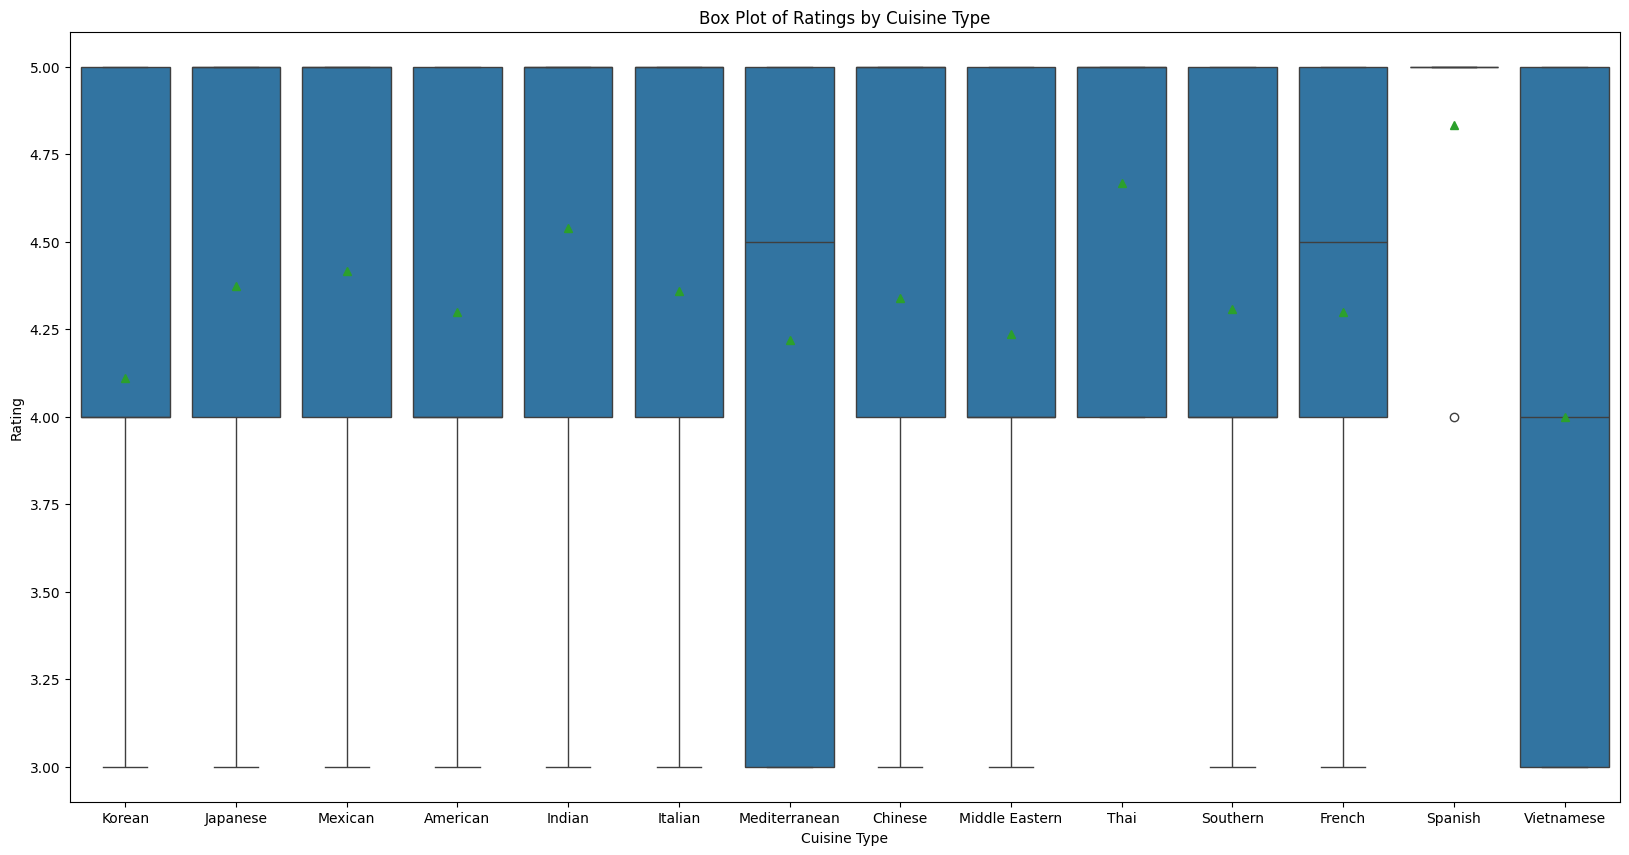

In [ ]:
# We set the box plot size

plt.figure(figsize=(20, 10))

# Then we set the x and the y with the showmeans equal to True to show the means

sns.boxplot(x = "cuisine_type", y = "rating", data = df, showmeans = True)

# We set the x and y labels and the title

plt.xlabel("Cuisine Type")

plt.ylabel("Rating")

plt.title("Box Plot of Ratings by Cuisine Type")

plt.show()

#### Observations:

We can see that the spanish cuisine has 11 five star reviews and 1 four star review showing as an outlier.

We can also see that both the mediterranean and vietnamese cuisines have a wide range of reviews from 5 stars to 3.

### Conclusions:
  
The top five restaurants in number of orders are:

Shake Shack                  
The Meatball Shop
Blue Ribbon Sushi            
Blue Ribbon Fried Chicken     
Parm,

The restaurants themselves aren't really surprising, as sushi is always popular and is on the rise, fried chicken is also always popular.

Shake Shack is considered by many to be the best burger franchise in the east coast, specially in New York. Opposing the Five Guys franchise in the west coast, as contenders for the best burger franchise in the whole country.

The Meatball Shop is an italian restaurant and New York has had a deep and vast italian culture by many years.

These restaurants belong to the top 4 most popular cuisine types which are American, Japanese, Italian and Chinese by a considerable margin.

There are a lot more orders on weekends, which makes sense, people want to relax and might not want to cook or leave their houses.

The delivery time is higher on weekdays.
The mean delivery time for the weekdays is 28.34 minutes, and for the weekends is 22.47 minutes.
This might be due to the rush hour traffic on weekdays.
Would need to see data on the times that these weekday deliveries are taking place.

In regards to the histograms and boxplots, there isn't really significant data.

The most popular cuisine type on weekends is American.

The percentage of orders that cost more than 20 dollars is 29.24%

The mean order delivery time is 24.16 minutes.

There is a very minor correlation between the cost of the order and the rating, but it isn't substantial.

Acording to the data, there isn't a direct correlation between total wait time and rating.

There is a direct correlation between the top 5 most ordered restaurants and the top 4 restaurants with the highest rating and more than 50 ratings, as the restaurants from this rating data frame are all in the top 5 most ordered restaurants.

The net revenue generated by the company across all orders is 3688.73 dollars.

We can see that 10.54% of orders take more than 60 minutes to get prepared and delivered, which is a long time, but it only applies to 10.54% of orders.

### Recommendations:

If we look at cuisine types American, Japanese, Italian and Chinese are the most popular by a considerable margin. They will always be the most popular due to the strong history of the cultures surrounding these cuisine types in New York and to the demand.

The food aggregator has two options, it can either choose to give these cuisine types priority, or maybe try to give the other cuisine types some more exposure in their app, or some sort of discount to help boost sales.

For example, if we look at the most popular cuisine types after the first 4 which lead orders by a huge margin, we have mexican, indian and middle eastern.

These cuisine types also represent the rise in population of citizens from these cultures in New York. These could be some candidates to boost or give a discount if they choose to go down that path.

However, if they want to try and experiment with boosting the exposure or discounting just one, my recomendation would be to go with mexican.

It is the cuisine type with the most potential of rising demand, because it is the most likely to have an increase in population and therefore in demand, due to its proximity to America.

Also there already is a big mexican food scene in California, again due to its proximity with mexico, but also to the percentage of latino culture and peoples in the region.

I've already seen mexican food experts from Mexico and California state that the mexican food scene in New York doesn't even compare to the one in California.

So they could choose some of the best mexican restaurants in New York and give them some sort of incentive. Or they could create a program with incentives and help to support the creation of a new mexican restaurant that is on par with the ones in California, maybe with some contacts they already have there.

There is a market with huge potential and lots of demand, not only by latinos, but also by locals. For example a lot of americans have the tradition to do taco tuesday, also during superbowl games, there is the tradition of serving mexican food.

If they want to explore a new market, I think it has a lot of potential for success, and for new revenue.

### Further Analysis:

The Mexican market idea was brought through general domain specific knowledge, but let's explore to see if we can see some trends in the data.


In [ ]:
# Count mexican food orders by day of the week
mexican_orders = df[df["cuisine_type"] == "Mexican"].groupby("day_of_the_week")["order_id"].count()
print(mexican_orders)

day_of_the_week
Weekday    24
Weekend    53
Name: order_id, dtype: int64


In [ ]:
# Mexican cost of order average by day of the week
mexican_cost_avg = df[df["cuisine_type"] == "Mexican"].groupby("day_of_the_week")["cost_of_the_order"].mean()
print(mexican_cost_avg)

day_of_the_week
Weekday    16.555833
Weekend    17.103962
Name: cost_of_the_order, dtype: float64


In [ ]:
# Mexican rating average by day of the week
mexican_avg_ratings = df[df["cuisine_type"] == "Mexican"].groupby("day_of_the_week")["rating"].mean()
print(mexican_avg_ratings)

day_of_the_week
Weekday    4.3750
Weekend    4.4375
Name: rating, dtype: float64


#### Observations:
We don't see the taco tuesday trend in the data, we actually see the opposite. Order counts, average cost of order and average rating are all up in weekends in comparison with weekdays for Mexican food.

### Further Analysis:
Let's see if we find this trend in the oder cuisine types.




In [ ]:
# The aggfunc parameter specifies how to aggregate values when multiple rows have the same combination of index and column values.
df.pivot_table(index = "cuisine_type", columns = "day_of_the_week", values = "order_id", aggfunc = "count" )

day_of_the_week,Weekday,Weekend
cuisine_type,,
American,169,415
Chinese,52,163
French,5,13
Indian,24,49
Italian,91,207
Japanese,135,335
Korean,2,11
Mediterranean,14,32
Mexican,24,53


In [ ]:
df.pivot_table(index = "cuisine_type", columns = "day_of_the_week", values = "cost_of_the_order", aggfunc = "mean")

day_of_the_week,Weekday,Weekend
cuisine_type,,
American,15.308343,16.731735
Chinese,17.147692,16.036442
French,20.866000,19.381538
Indian,17.162500,16.800816
Italian,16.890110,16.211449
Japanese,16.368074,16.278925
Korean,12.180000,14.332727
Mediterranean,14.040000,16.102500
Mexican,16.555833,17.103962


In [ ]:
df.pivot_table(index = "cuisine_type", columns = "day_of_the_week", values = "rating", aggfunc = "mean")

day_of_the_week,Weekday,Weekend
cuisine_type,,
American,4.252252,4.319066
Chinese,4.230769,4.364486
French,4.500000,4.250000
Indian,4.428571,4.583333
Italian,4.403226,4.336364
Japanese,4.364865,4.376884
Korean,4.500000,4.000000
Mediterranean,4.000000,4.333333
Mexican,4.375000,4.437500


#### Observations:
We actually see this trend in order counts for all cuisine types. However, for cost of order average and rating average we only see this trend clearly in American food. We can also see it in Spanish, Thai and Vietnamese, but their order counts are vastly different from weekdays to weekend, which might be skewing the data. Let's check if this is true.


### Further Analysis:
Let's check for standard deviation, median and outliers.

In [ ]:
df.pivot_table(index = "cuisine_type", columns = "day_of_the_week", values = "rating", aggfunc = "std")

day_of_the_week,Weekday,Weekend
cuisine_type,,
American,0.756409,0.744345
Chinese,0.815239,0.757261
French,0.707107,0.886405
Indian,0.851631,0.603561
Italian,0.734617,0.757559
Japanese,0.768816,0.713271
Korean,0.707107,0.816497
Mediterranean,0.894427,0.856349
Mexican,0.806226,0.669015


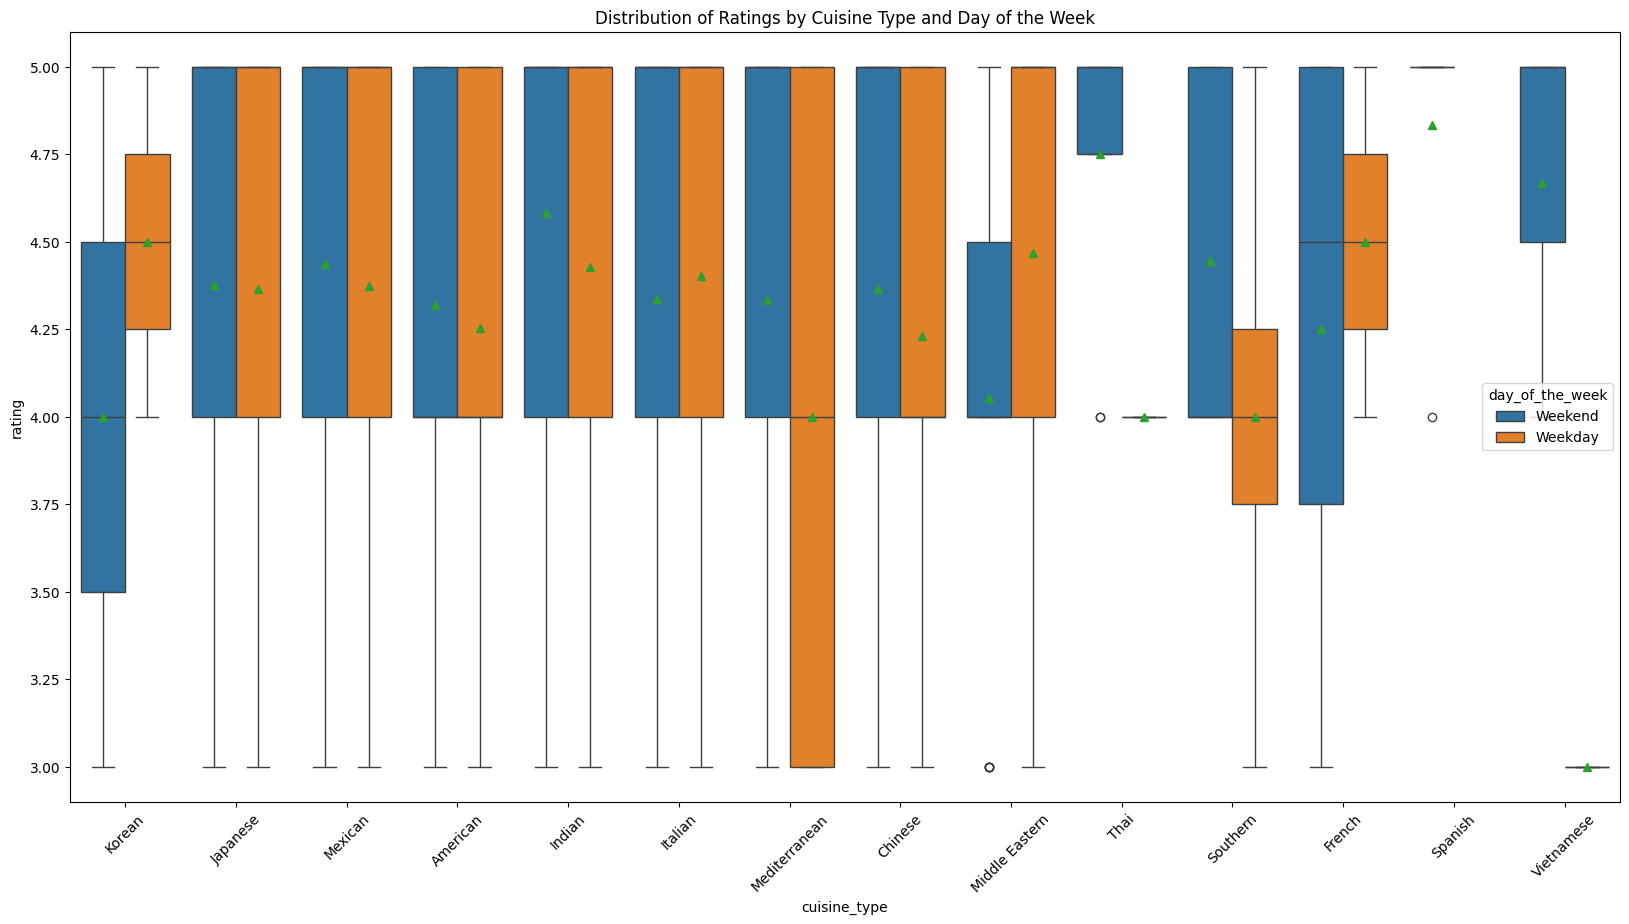

In [ ]:
plt.figure(figsize = (20,10))

sns.boxplot(x = "cuisine_type", y = "rating", hue = "day_of_the_week", data = df, showmeans = True)

plt.xticks(rotation = 45)

plt.title("Distribution of Ratings by Cuisine Type and Day of the Week")

plt.show()

In [ ]:
df.pivot_table(index = "cuisine_type", columns = "day_of_the_week", values = "rating", aggfunc = "median")

day_of_the_week,Weekday,Weekend
cuisine_type,,
American,4.0,4.0
Chinese,4.0,5.0
French,4.5,4.5
Indian,5.0,5.0
Italian,5.0,5.0
Japanese,5.0,5.0
Korean,4.5,4.0
Mediterranean,4.0,5.0
Mexican,5.0,5.0


#### Observations:
We can see that the majority of cuisines have a median rating of 5.0 on both weekdays and weekends, which suggests that the majority of ratings tend to be high overall.

We can also see that Chinese, Mediterranean, Thai, Vietnamese and Spanish also improved on weekends, suggesting they may perform better during that time.

However there's still the question of the order count difference for Spanish, Thai and Vietnamese. And if we look at the standard deviation this is exactlly what we find. They have low standard deviation values for the weekend but there is a big difference compared with the weekdays values with missing values for Spanish and Thai and no variability for Vietnamese.

Given that these cuisine types had very few weekday orders, the lack of variability (or absence of data) makes their weekend improvement questionable.

We also see more proof of the supremacy of American, Italian, Japanese and Chinese cuisine types in New York with American, Italian and Japanese remaining stable in terms of median from weekdays to weekend and Chinese increasing. Mexican also remained stable.

In terms of standard deviation we see American, Chinese and Japanese remaining stable from weekdays to weekend with Chinese and Japanese getting slightly more stable. Mexican gained more stability on the weekends and Italian decreased slightly, but still within reason to believe it is a good bet on the weekends.


### Further Recommendations:
We have to take into account the fact that there are vastly more orders on weekends than on weekdays, by more than double, with about 1350 vs about 550.

As such, cuisines with high weekend order counts (American, Japanese, Italian, Chinese) have ratings that remain fairly consistent, which suggests their scores are more trustworthy. Making them the main biggest focus on a potential promotion for the weekend, with the main focus being on American cuisine, given that it is the most requested by far.

I still believe that Mexican is a high potential growth market due to cultural reasons, but also through data, which also shows increases on the weekend. So it is a better idea to prioritize weekend promotions for Mexican food for now until further analysis with newer data down the line on the Taco Tuesday idea.